In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [56]:
#create data
df_train=pd.read_csv("train_final_complete.csv")
df_train.head(5)
df_train["cando_count"]=np.zeros(len(df_train["property_type"]))
df_train["landed_count"]=np.zeros(len(df_train["property_type"]))
df_train["hdb_count"]=np.zeros(len(df_train["property_type"]))
for i in range(len(df_train["property_type"])):
    if df_train["property_type"][i]=="condo":
        df_train["cando_count"][i]=1
    else:
        df_train["cando_count"][i]=0
    if df_train["property_type"][i]=="landed":
        df_train["landed_count"][i]=1
    else:
        df_train["landed_count"][i]=0
    if df_train["property_type"][i]=="hdb":
        df_train["hdb_count"][i]=1
    else:
        df_train["hdb_count"][i]=0

    

<ipython-input-56-59cc2dff5940>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["cando_count"][i]=0
<ipython-input-56-59cc2dff5940>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["landed_count"][i]=0
<ipython-input-56-59cc2dff5940>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["hdb_count"][i]=1
<ipython-input-56-59cc2dff5940>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [64]:
df_train_cando_count=df_train.groupby("subzone")["cando_count"].sum().to_frame()
df_train_hdb_count=df_train.groupby("subzone")["hdb_count"].sum().to_frame()
df_train_landed_count=df_train.groupby("subzone")["landed_count"].sum().to_frame()
df_train_size_sqft=df_train.groupby("subzone")["size_sqft"].mean().to_frame()
df_train_subzone_per_price_encoded=df_train.groupby("subzone")["subzone_per_price_encoded"].mean().to_frame()

In [41]:
df_population=pd.read_csv(r"C:\Users\Lenovo\Desktop\cs5228\project\auxiliary-data\sg-subzones.csv")

In [69]:
df_task3=pd.merge(df_population,df_train_cando_count,how='left',left_on='name',right_on="subzone")
df_task3=pd.merge(df_task3,df_train_hdb_count,how='left',left_on='name',right_on="subzone")
df_task3=pd.merge(df_task3,df_train_landed_count,how='left',left_on='name',right_on="subzone")
df_task3=pd.merge(df_task3,df_train_size_sqft,how='left',left_on='name',right_on="subzone")
df_task3=pd.merge(df_task3,df_train_subzone_per_price_encoded,how='left',left_on='name',right_on="subzone")


In [76]:
df_task3.to_csv("train_task3.csv",index=False,header=True)

In [3]:
df2=pd.read_csv("task3.csv",header=0)

In [26]:
X = df2[["area_size","cando_count","hdb_count","landed_count","size_sqft","subzone_per_price_encoded","per_size","per_area_size","per_price"]]
y = df2[["population"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [27]:
#random_forest
parameters = {
    'max_depth': [5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 400],
    'max_features': [1, 2, 4, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(), 
    parameters, 
    cv=10, 
    n_jobs = -1) # use all processors
grid_search.fit(X_train, y_train)

print('Best parameters set found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_random_forest_regressor = grid_search.best_estimator_

Best parameters set found: {'max_depth': 50, 'max_features': 8, 'n_estimators': 50}
Best score: 0.6530137872623503


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Text(0.5, 1.0, 'Feature Importance-random forest')

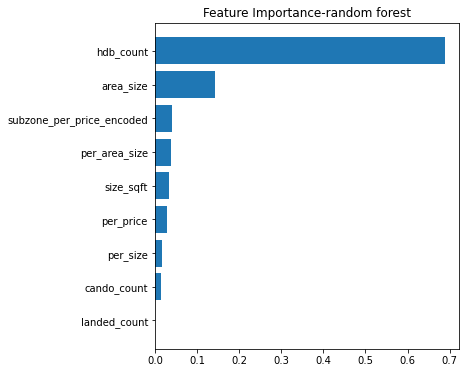

In [28]:
reg = best_random_forest_regressor
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance-random forest")

In [35]:
predicted = best_random_forest_regressor.predict(X_test)
print(np.mean(np.square(predicted-y_test["population"])))


70876797.91183674


In [36]:
#Gradient Boosting
parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200, 400]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(), 
    parameters,
    cv=10, 
    n_jobs = -1) # use all processors
grid_search.fit(X_train, y_train)

print('Best parameters set found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_gradient_boosting_regressor = grid_search.best_estimator_

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters set found: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}
Best score: 0.7479229964466702


In [38]:
predicted = best_gradient_boosting_regressor.predict(X_test)
print(np.mean(np.square(predicted-y_test["population"])))

63760493.28520674


Text(0.5, 1.0, 'Feature Importance-gradient boosting')

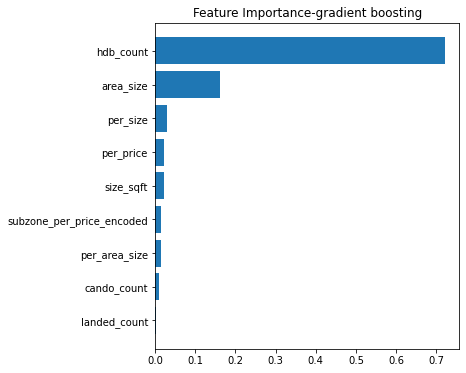

In [39]:
reg = best_gradient_boosting_regressor
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance-gradient boosting")